# Lecture 3: Gaussian Eliminations and LU Decomposition

This is an introductory part of the lecture

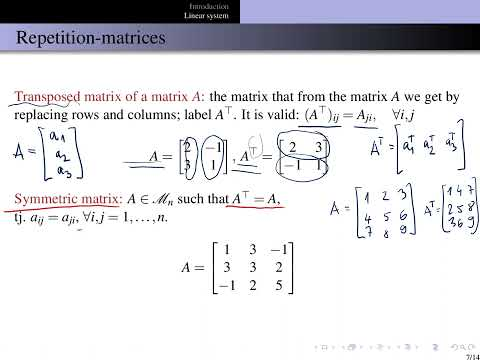

In [1]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("lH_0wPqBLio")
display(vid)

Now we show how to perform Gaussian elimination and obtain LU factorization of the matrix on one simple example

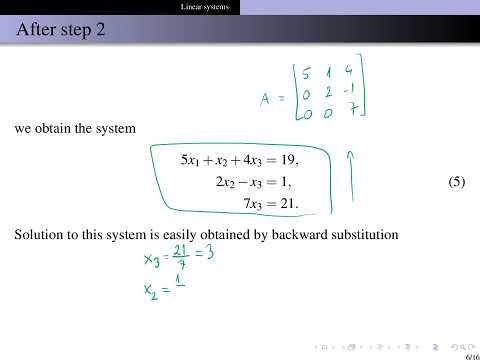

In [3]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("h9HNmashA4s")
display(vid)

Now, we will explain the proces of Gaussian elimnation and LU factorization in general

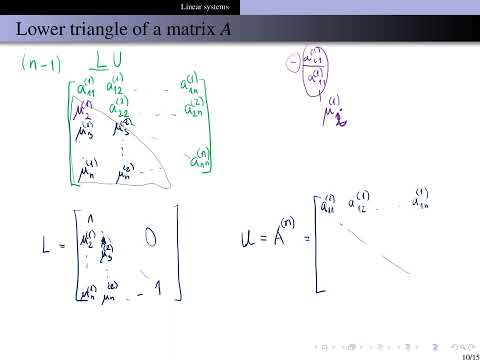

In [4]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("x8U4xws_KXQ")
display(vid)

Here, we give an implemantation of a function that gives $LU$ factorization of a matrix A

In [15]:
import numpy as np
def LU_dekompozicija(A):
    n=len(A)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k]!=0.0:
                A[i,k]=A[i,k]/(A[k,k]) #multiplikator 
                A[i, k+1:n]=A[i, k+1:n]-A[i,k]*A[k, k+1:n]
    return A
    

We will apply this function on a matrix $$\begin{bmatrix} 2& 1& 0\\ 4& 4& 5\\ 6& 7& 8\end{bmatrix}$$
At the end as output we get the matrix that in the upper triangle has elements of the matrix $U$ and elemenets below the main diagonal are elemnts of the matrix $L$

In [16]:
A=np.array([[2.0, 1.0, 3.0 ],[4.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
B=LU_dekompozicija(A)
print(B)

[[ 2.  1.  3.]
 [ 2.  2. -1.]
 [ 3.  2.  1.]]


MAtrix $L$ can be obtained if we use the function np.tril (please read how this function work in documentation) and matrix $U$ we get by using the function **np.triu(input matrix, id of diagonal)**

The function *tril(input matrix, diagonal identifier )* returns a matrix that takes the lower part of the input matrix below (and including) the diagonal. The main diagonal have the identifier 0, the diagonal above it 1 and the diagonal below -1, etc. It is similar to the function * triu(input matrix, diagonal id)*

In [17]:
L=np.tril(A,-1)+np.identity(3)
print(L)

[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]


In [18]:
U=np.triu(A,0)
print(U)

[[ 2.  1.  3.]
 [ 0.  2. -1.]
 [ 0.  0.  1.]]


Solving the system Ly=b (forward substitutions). in the code below, the function np.dot(x,y) represents the scalar product of vectors. (The diagonal elements of $L$ are 1 so there is no need to divide by the diagonal elements in the code below)

In [19]:
def forward(L,b):
# supstitucija unaprijed
    b[0] = b[0] / L[0, 0]
    n=len(L)
    for i in range(1, n):
        b[i] = (b[i] - np.dot(L[i,:i], b[:i])) / L[i,i]
    return b

In [20]:
b=np.array([[-1],[-1],[-2]])

In [21]:
y=forward(L,b)
print(y)


[[-1]
 [ 1]
 [-1]]


Solving $Ux=y$ -backward substitutions

In [22]:
def backward(U,b):
# supstitucija unatrag
    n=len(U)
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(U[k,k+1:n],b[k+1:n]))/U[k,k]
    return b

In [23]:
x=backward(U,y)
print(x)

[[ 1]
 [ 0]
 [-1]]


Now we will solve few examples will LU factorization

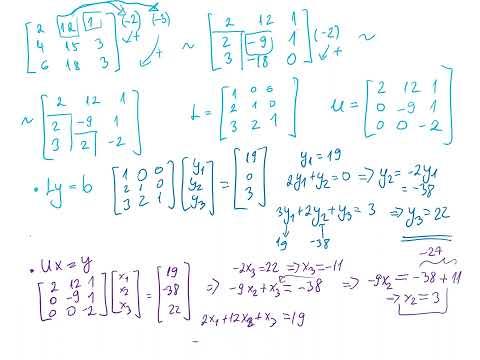

In [5]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("x0pejWBJPng")
display(vid)

# LECTURE 4: Tridiagonal systems. Introduction to pivoting. PLU factorization.

## 4.1. Tridiagonal systems

In this part of the lecture, we will show how a tridiagonal linear system is created from the discretization of a differential equation.

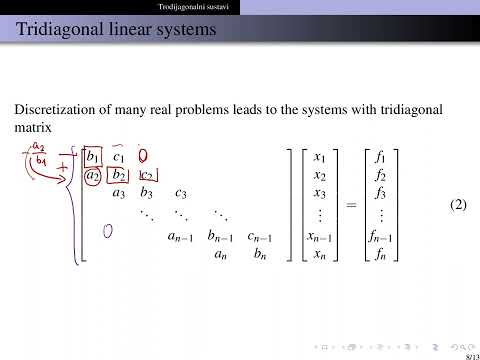

In [8]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("y_4oAk660hk")
display(vid)

### Implementation of Thomas Alghoritm and solving two-point boundary value problem
First, we define a function that has as output vectors that are obtained from the LU decomposition of the tridiagonal matrix. So if the matrix is of the form
$$A=\begin{bmatrix}
b_{1} & c_{1} &    &    &  &  &   \\
a_2   & b_{2} & c_2  &   &    &    \\
&  a_3  & b_3 & c_3    &   &    \\
&     &  \ddots &  \ddots & \ddots &    \\
&     &   &  a_{n-1} & b_{n-1} &  c_{n-1}   \\
&   &  &  & a_{n} & b_{n}
\end{bmatrix}$$

in the code below we will have vectors
$$b=\left[b_0,\ldots,b_{n-1}\right]$$
$$a=\left[a_0,\ldots,a_{n-2}\right]$$
$$c=\left[c_0,\ldots,c_{n-2}\right]$$


since in Python indices of vectors start from 0. This function the outputs put in the same vectors. Thus, the vector representing the first lower diagonal of matrix $L$ is stored in vector $a$, while the vector of the main diagonal of matrix $U$ is stored in vector $b$ and the vector of the first upper diagonal of matrix $U$ is stored in vector $c$ .

In [24]:
def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

Now we define a function that, for given input vectors (representing the lower diagonal of the matrix $L$, the main and upper diagonal of the matrix $U$), solves the system $Ax=f$ using the $LU$ factorization of the matrix $A$. In doing so, it stores the solution in the vector $f$

In [25]:
def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f

in the code below we set the elements of all input vectors. Why they look like this - see the video above this implementation

In [26]:
def  set_abcf(x, alpha, beta):
    n=len(x)-2
    h=1.0/(n+1)
    f=np.ones((n))*h*h
    b=np.ones((n))*2.0
    a=np.ones((n-1))*(-1)
    c=np.ones((n-1))*(-1)
    for i in range(1,n+1):
        f[i-1]=f[i-1]*RHS_b(x[i])
    f[0]=f[0]+alpha
    f[n-1]=f[n-1]+ beta
    return a, b, c, f

Here we define the right side of our problem, i.e. we will solve the boundary problem
\begin{align*}
-u''(x) & = 16\pi^2\sin(4\pi x),\quad x\in(0,1) \\
u(0)= & u(1)=0.
\end{align*}

It is not difficult to calculate analytically that the solution to this problem is a function $u(x)=\sin(4\pi x)$

In [27]:
def RHS_b(x):
    return 16.0*np.pi*np.pi*np.sin(4.0*np.pi*x)


In the next part of the code, we choose $n=5$ and introduce the plotting library matplotlib

In [28]:
n1=5
n11=n1+2
x1=np.linspace(0,1,n11)
import matplotlib.pyplot as plt

Now we set the vectors for $n=5$ and solve the system

In [29]:
a,b,c,f=set_abcf(x1,0,0)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)

We also define a function that is the exact solution to our problem to see how good the approximation is

In [30]:
def Exact_solution(x):
    return np.sin(4.0*np.pi*x)

Now we plot the exact solution, and our approximations shown in red dots

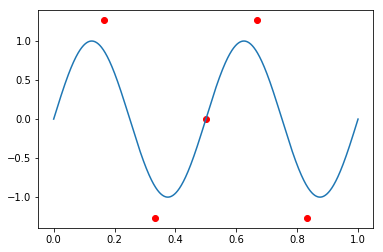

In [31]:
n=len(x1)
z1=np.linspace(0,1,1000)
plt.plot(x1[1:n-1],u, "ro")
plt.plot(z1, Exact_solution(z1))

Now we will take a denser grid and see if our approximation of the solution at the given points will be better

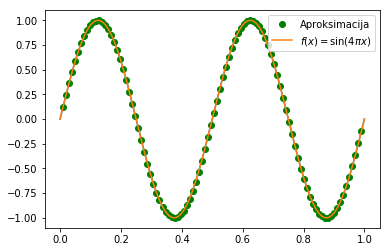

In [32]:

n3=100
n33=n3+2
x3=np.linspace(0,1,n33)
a,b,c,f=set_abcf(x3,0,0)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)
plt.plot(z1, Exact_solution(z1))
z1=np.linspace(0,1,1000)

plt.plot(x3[1:n33-1],u, "go", label='Aproksimacija')
plt.plot(z1, Exact_solution(z1), label=r"$f(x)=\sin(4\pi x)$")

plt.legend(loc='upper right', fontsize=10)

plt.savefig('aproksimacija.pdf')


We see that by increasing the number of points, we get a better approximation of the solution.

## PLU factorization and pivoting

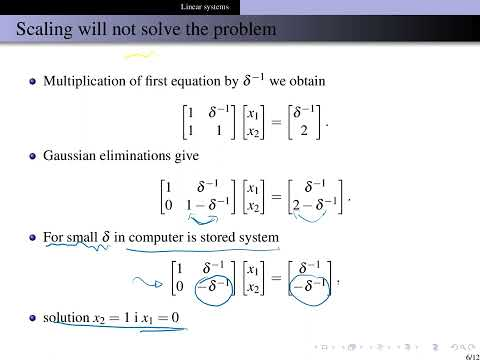

In [33]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("3mMaaR2bhiM")
display(vid)

Implementation of a function that computes the $PLU$ decomposition of the matrix A

In [34]:
import numpy as np
def PLU_dekompozicija(A):
    n=len(A)
    p= np.arange(n)
    for k in range(0,n-1):
        #pivotiranje
        m=k+np.argmax(A[k:n,k])
        p[[k,m]]=p[[m,k]]
        A[[k,m]]=A[[m,k]]
        for i in range(k+1,n):
            if A[i,k]!=0.0:
                A[i,k]=A[i,k]/(A[k,k]) #multiplikator 
                A[i, k+1:n]=A[i, k+1:n]-A[i,k]*A[k, k+1:n]
    return [A,p]
    

We will apply this function on a matrix $$\begin{bmatrix} 3& 17& 10\\ 2& 4& -2\\ 6& 18& -12\end{bmatrix}$$
As output we obtain the matrix which in upper triangle has the matrix $U$ and elements below the main diagonal are elements of matrix $L$

In [35]:
A=np.array([[3.0, 17.0, 10.0 ],[2.0, 4.0, -2.0], [6.0, 18.0, -12.0]])
A, p =PLU_dekompozicija(A)
print("A=",A)
print("p=",p)


A= [[  6.          18.         -12.        ]
 [  0.5          8.          16.        ]
 [  0.33333333  -0.25         6.        ]]
p= [2 0 1]


In [36]:
L=np.tril(A,-1)+np.identity(3)
print(L)

[[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.33333333 -0.25        1.        ]]


In [37]:
U=np.triu(A,0)
print(U)

[[  6.  18. -12.]
 [  0.   8.  16.]
 [  0.   0.   6.]]


In [38]:
P_matrix=np.identity(3)[p]
print(P_matrix)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


###  Obtaining PLU factorization using Python's SciPy library



The lu function from the scipy.linalg package outputs the matrices $P$, $L$, $U$, so that $A=PLU$, so the matrix $P$ given by this function is actually the transposed matrix $P$ that we introduced in lectures, because $P^TP=I$ is well known to us. So we have:
$P^T A=LU$

In [39]:
from scipy.linalg import lu

In [40]:
A=np.array([[3.0, 17.0, 10.0 ],[2.0, 4.0, -2.0], [6.0, 18.0, -12.0]])

In [41]:
P, L, U = lu(A)

In [42]:
print("P=\n", P)
print("L=\n", L)
print("U=\n", U)

P=
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L=
 [[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.33333333 -0.25        1.        ]]
U=
 [[  6.  18. -12.]
 [  0.   8.  16.]
 [  0.   0.   6.]]


In [43]:
print("Permutacijska matrica=\n",np.transpose(P))

Permutacijska matrica=
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


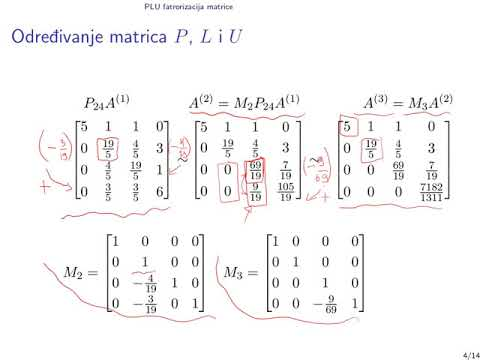

In [44]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("kNbNvxmdJho")
display(vid)